# ‏وَأَن لَّيْسَ لِلإِنسَانِ إِلاَّ مَا سَعَى, وَأَنَّ سَعْيَهُ سَوْفَ يُرَى , ثُمَّ يُجْزَاهُ الْجَزَاء الأَوْفَى.



In [497]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [498]:
file=pd.read_csv(r"Data Science Salaries 2023.csv")

In [499]:
file

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [500]:
file.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [501]:
file.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [502]:
# experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
file.value_counts('experience_level')

experience_level
SE    2516
MI     805
EN     320
EX     114
Name: count, dtype: int64

In [503]:
file.value_counts( 'employment_type')

employment_type
FT    3718
PT      17
CT      10
FL      10
Name: count, dtype: int64

In [504]:
file.value_counts('job_title')

job_title
Data Engineer                1040
Data Scientist                840
Data Analyst                  612
Machine Learning Engineer     289
Analytics Engineer            103
                             ... 
Compliance Data Analyst         1
Cloud Data Architect            1
BI Data Engineer                1
Azure Data Engineer             1
Staff Data Scientist            1
Name: count, Length: 93, dtype: int64

In [505]:
file.value_counts('salary_currency')

salary_currency
USD    3224
EUR     236
GBP     161
INR      60
CAD      25
AUD       9
BRL       6
SGD       6
PLN       5
CHF       4
DKK       3
JPY       3
TRY       3
HUF       3
THB       2
CZK       1
CLP       1
HKD       1
ILS       1
MXN       1
Name: count, dtype: int64

In [506]:
file.value_counts('employee_residence')

employee_residence
US    3004
GB     167
CA      85
ES      80
IN      71
      ... 
LU       1
KW       1
JE       1
IR       1
EE       1
Name: count, Length: 78, dtype: int64

In [507]:
file.value_counts('company_location')

company_location
US    3040
GB     172
CA      87
ES      77
IN      58
      ... 
EG       1
MT       1
MK       1
MD       1
VN       1
Name: count, Length: 72, dtype: int64

In [508]:
file.value_counts('company_size')

company_size
M    3153
L     454
S     148
Name: count, dtype: int64

<Axes: >

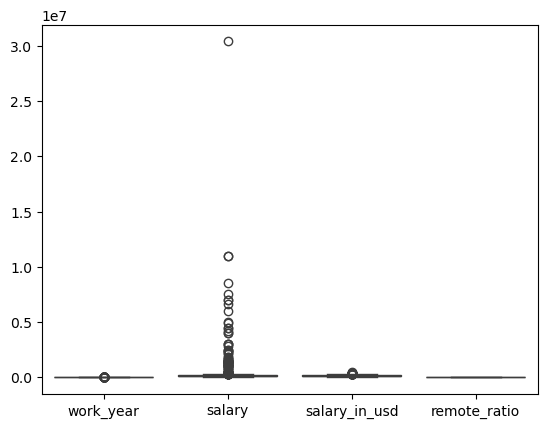

In [509]:
sns.boxplot(file)

In [510]:
numeric_cols = file.select_dtypes(include=['number'])
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

# حذف القيم الشاذة فقط من الأعمدة الرقمية
file_cleaned = file[~((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))).any(axis=1)]



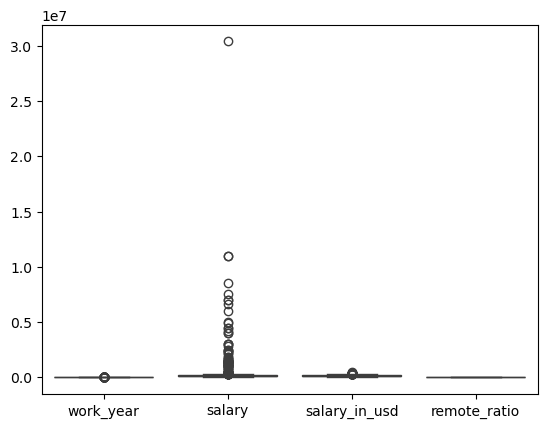

In [511]:
sns.boxplot(file)
plt.show()

In [512]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for col in ['experience_level', 'employment_type', 'salary_currency', 'employee_residence', 
            'company_location', 'company_size', 'work_year', 'job_title','salary']:
    file[col] = encoder.fit_transform(file[col])


In [513]:
file

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,3,3,2,84,127,7,85847,26,100,25,0
1,3,2,0,66,28,19,30000,75,100,70,2
2,3,2,0,66,23,19,25500,75,100,70,2
3,3,3,2,47,493,19,175000,11,100,12,1
4,3,3,2,47,266,19,120000,11,100,12,1
...,...,...,...,...,...,...,...,...,...,...,...
3750,0,3,2,47,761,19,412000,75,100,70,0
3751,1,2,2,84,411,19,151000,75,100,70,0
3752,0,0,2,47,207,19,105000,75,100,70,2
3753,0,0,0,17,188,19,100000,75,100,70,0


In [514]:
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()

columns_to_scale = ['job_title', 'salary', 'salary_currency', 'employee_residence', 'remote_ratio', 'company_location','salary_in_usd']

file[columns_to_scale] = scaler.fit_transform(file[columns_to_scale])


In [515]:
file

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,3,3,2,0.913043,0.156020,0.368421,0.190771,0.337662,1.0,0.352113,0
1,3,2,0,0.717391,0.034398,1.000000,0.066667,0.974026,1.0,0.985915,2
2,3,2,0,0.717391,0.028256,1.000000,0.056667,0.974026,1.0,0.985915,2
3,3,3,2,0.510870,0.605651,1.000000,0.388889,0.142857,1.0,0.169014,1
4,3,3,2,0.510870,0.326781,1.000000,0.266667,0.142857,1.0,0.169014,1
...,...,...,...,...,...,...,...,...,...,...,...
3750,0,3,2,0.510870,0.934889,1.000000,0.915556,0.974026,1.0,0.985915,0
3751,1,2,2,0.913043,0.504914,1.000000,0.335556,0.974026,1.0,0.985915,0
3752,0,0,2,0.510870,0.254300,1.000000,0.233333,0.974026,1.0,0.985915,2
3753,0,0,0,0.184783,0.230958,1.000000,0.222222,0.974026,1.0,0.985915,0


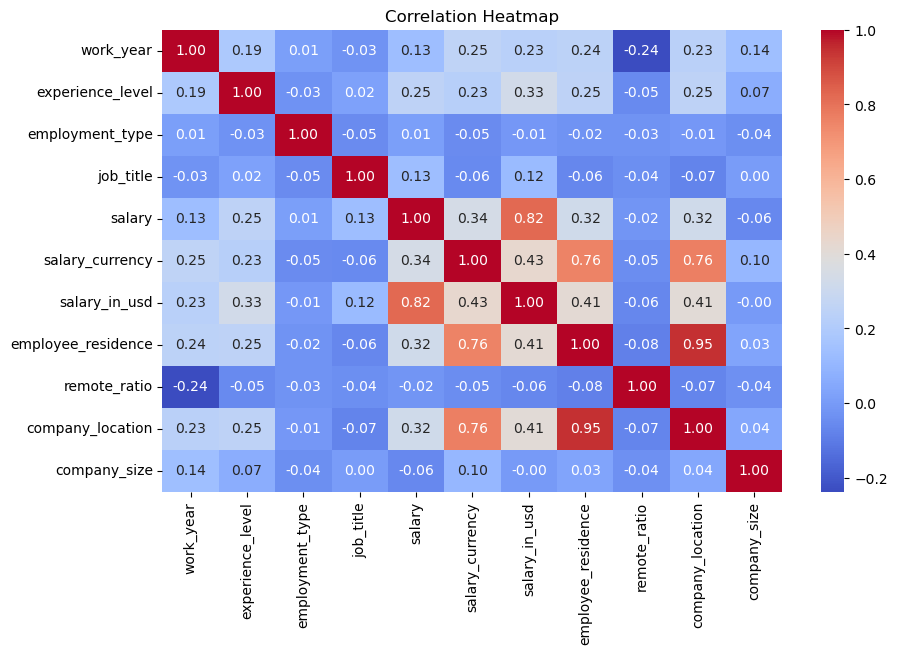

In [516]:

plt.figure(figsize=(10,6))
sns.heatmap(file.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [517]:
labels=file['salary_in_usd']
features=file.drop(labels=['salary_in_usd','employment_type','remote_ratio','company_size'],axis=1)

In [518]:
x_train,x_test,y_train,y_test=train_test_split(features,labels,test_size=0.3,random_state=42)

# Apply Linear Regression

In [519]:
model_1_Linear_Regression=LinearRegression()

model_1_Linear_Regression.fit(x_train,y_train)

model_1_Linear_Regression_prediction=model_1_Linear_Regression.predict(x_test)

In [520]:
from sklearn.metrics import mean_squared_error

mse=mean_squared_error(y_test,model_1_Linear_Regression_prediction)
print(mse)

0.006010505859902545


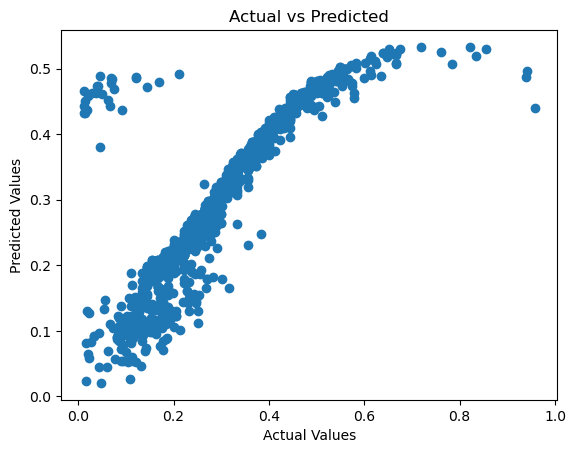

In [521]:
import matplotlib.pyplot as plt

plt.scatter(y_test, model_1_Linear_Regression_prediction)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()


In [522]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, model_1_Linear_Regression_prediction)
print("R² Score:", r2)


R² Score: 0.6930071346973685


# Apply Polynomial Regression

In [523]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

degree = 3
model_poly = make_pipeline(PolynomialFeatures(degree), LinearRegression())

model_poly.fit(x_train, y_train)
model_poly_predictions=model_poly.predict(x_test)
r2_poly = model_poly.score(x_test, y_test)
print("R² Score (Polynomial Regression):", r2_poly)


R² Score (Polynomial Regression): 0.8631539720575249


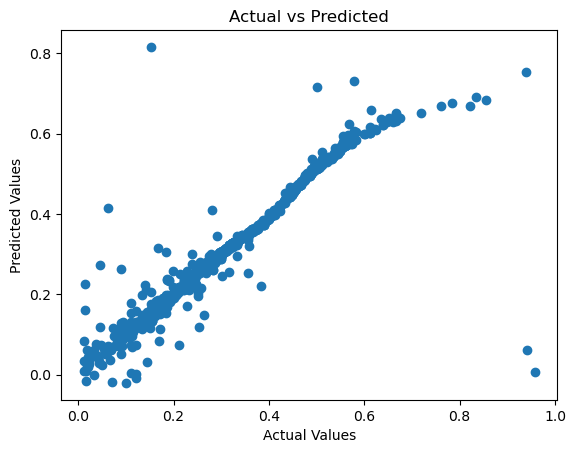

In [524]:
import matplotlib.pyplot as plt

plt.scatter(y_test, model_poly_predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()